In [1]:
from get_datasets.Get_Datasets import get_data_array, get_datasets
from src.Evolutionary_Algorithm import create_next_population, create_first_population, select_best_2_model

import re
import os
import random
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

In [2]:
x_train, y_train, x_val, y_val, x_test, y_test = get_data_array(train_dir='chest_xray_new/train',
                                                                test_dir='chest_xray_new/test')

  0%|          | 0/3883 [00:00<?, ?it/s]

  0%|          | 0/2698 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/234 [00:00<?, ?it/s]

In [3]:
train_ds_rand, val_ds, test_ds, train_ds = get_datasets(x_train, y_train, x_test, y_test, x_val, y_val)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-01-22 14:10:45.502069: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-22 14:10:45.751839: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


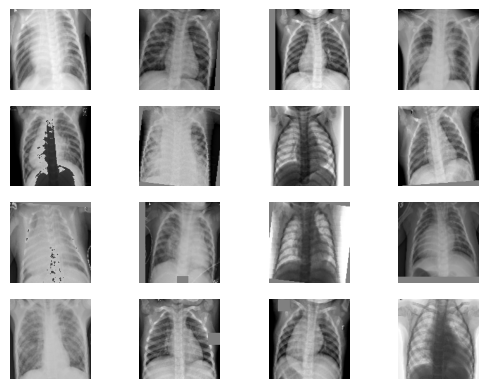

In [4]:
sample_images, _ = next(iter(train_ds_rand))
plt.figure()
for i, image in enumerate(sample_images[:16]):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(image.numpy().astype("int"))
    plt.axis("off")